# Project Description

In this project data the number of births per year in the USA for the years 1994 to 2014 is explored. 

As data two datasets are used the [CDC]() dataset and the [SSA]() dataset both provied by FiveThirtyEight. The CDC dataset contains the number of births for the years 1994 to 2003 and the SSA dataset the births for the years 1994 to 2003
Hereto, a [dataset]( https://github.com/fivethirtyeight/data/tree/master/births) compiled by FiveThirtyEight is used. This dataset contains data for the year 2000 to 2014.

# Import Libaries

In [1]:
import os
import io
import urllib.request

from IPython.display import display

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn

# Set Global Variables

In [2]:
### Set the path to the CDC data
URL_CDC = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_1994-2003_CDC_NCHS.csv'
PATH_DATASET_CDC = 'data/' + URL_CDC.split('/')[-1]

### Set the path to the SSA data
URL_SSA = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv'
PATH_DATASET_SSA = 'data/' + URL_SSA.split('/')[-1]

# Project Preparation

## Download the data

In [3]:
def download_github_csv_data(url):
    """Download a csv file and stores it in the data folder of the project repository.

    Args:
        URL of the csv file

    Returns:
        None
    """
    if not os.path.exists('data/'):
        os.makedirs('data/')
        
    file = urllib.request.urlopen(url)

    df = pd.read_csv(io.TextIOWrapper(file))

    filename = url.split('/')[-1]
    path = 'data/' + filename
    
    df.to_csv(path, header=True, index=False, sep=',')

"""
Downloads the data to the data folder of a local repository after you run it once you can uncomment this lines.
To prevent the code from downloading the data every time you run the code.
"""
download_github_csv_data(URL_CDC)
download_github_csv_data(URL_SSA)

## Load the CDC Dataset

In [4]:
### Load the data to a df
df_cdc = pd.read_csv(PATH_DATASET_CDC)
### Inspect the first 5 rows of the dataset
display(df_cdc.head())

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


## Load the SSA Dataset

In [5]:
#Load the ssa dataset
df_ssa = pd.read_csv(PATH_DATASET_SSA)
#Print the first five entries
display(df_ssa.head())

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558


# Analysis

## Analysis of the CDC dataset 

In [6]:
### Count the number of births for years
df_cdc_by_year = df_cdc.groupby(['year'], as_index=False).sum()[['year', 'births']]
df_cdc_by_year.set_index(['year'], inplace=True)
display(df_cdc_by_year.transpose())

year,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003
births,3952767,3899589,3891494,3880894,3941553,3959417,4058814,4025933,4021726,4089950


In [7]:
### Inspect the point estimators of the dataset
display(df_cdc_by_year['births'].describe())

count    1.000000e+01
mean     3.972214e+06
std      7.326511e+04
min      3.880894e+06
25%      3.910080e+06
50%      3.956092e+06
75%      4.024881e+06
max      4.089950e+06
Name: births, dtype: float64

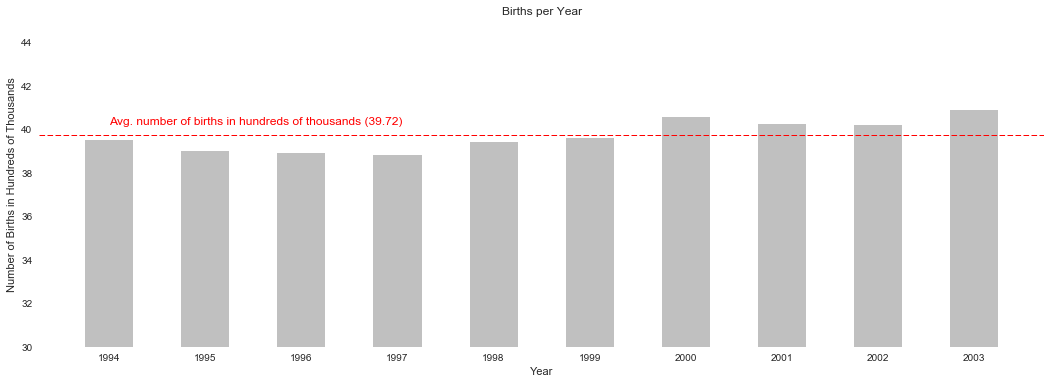

In [8]:
### Convert births into births hundreds of thousands
df_cdc_by_year['births_in_hundredThousand'] = df_cdc_by_year['births'] / 100000

bar_heights = df_cdc_by_year['births_in_hundredThousand'].values
bar_positions = np.arange(len(df_cdc_by_year.index))

fig, ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(6)

ax.bar(bar_positions, bar_heights, .5, color='silver')
ax.set_title('Births per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Births in Hundreds of Thousands')

ax.set_xticks(np.arange(len(df_cdc_by_year.index)))
ax.set_xticklabels(df_cdc_by_year.index)

ax.set_ylim([30,45])
ax.axhline(bar_heights.mean(), color='r', linestyle='dashed', linewidth=1)
line_text = 'Avg. number of births in hundreds of thousands (' + str(round(bar_heights.mean(),2)) + ')'
ax.text(0, bar_heights.mean() + 0.5 , line_text, color='r')
ax.set_facecolor('white')
plt.show()

## Analyse the births in SSA dataset

In [9]:
#Count the number of births for years
df_ssa_by_year = df_ssa.groupby(['year'], as_index=False).sum()[['year', 'births']]
df_ssa_by_year.set_index(['year'], inplace=True)
display(df_ssa_by_year.transpose())

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
births,4149598,4110963,4099313,4163060,4186863,4211941,4335154,4380784,4310737,4190991,4055975,4006908,4000868,3973337,4010532


In [10]:
### Inspect the point estimators of the datasetd
display(df_ssa_by_year['births'].describe())

count    1.500000e+01
mean     4.145802e+06
std      1.271873e+05
min      3.973337e+06
25%      4.033254e+06
50%      4.149598e+06
75%      4.201466e+06
max      4.380784e+06
Name: births, dtype: float64

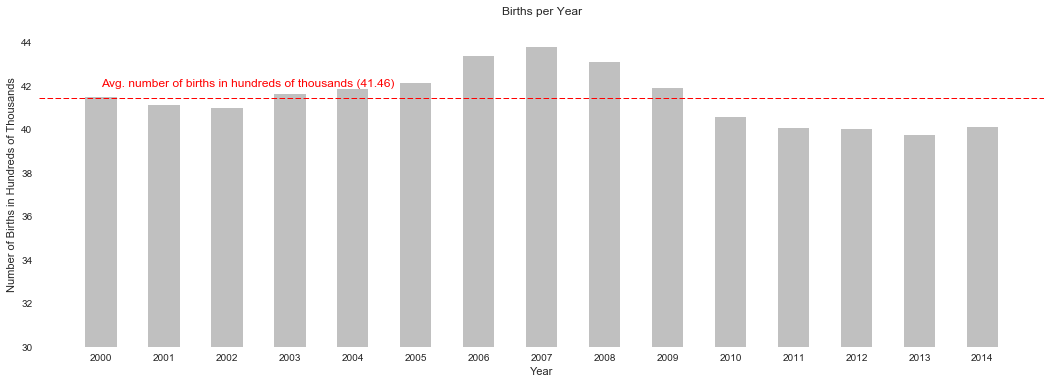

In [11]:
### Convert births into births hundreds of thousands
df_ssa_by_year['births_in_hundredThousand'] = df_ssa_by_year['births'] / 100000

bar_heights = df_ssa_by_year['births_in_hundredThousand'].values
bar_positions = np.arange(len(df_ssa_by_year.index))

fig, ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(6)

ax.bar(bar_positions, bar_heights, .5, color='silver')
ax.set_title('Births per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Births in Hundreds of Thousands')

ax.set_xticks(np.arange(len(df_ssa_by_year.index)))
ax.set_xticklabels(df_ssa_by_year.index)

ax.set_ylim([30,45])
ax.axhline(bar_heights.mean(), color='r', linestyle='dashed', linewidth=1)
line_text = 'Avg. number of births in hundreds of thousands (' + str(round(bar_heights.mean(),2)) + ')'
ax.text(0, bar_heights.mean() + 0.5 , line_text, color='r')
ax.set_facecolor('white')
plt.show()

# Merge the CDC and the SSA datasets

In [12]:
def append_mean(df1, df2):
    """Appends the rows of df1 to df1. 
    If there a rows with identical index the mean of the two rows is computed and set as new value for this rows

    Args:
        Two dataframes that should be merged.

    Returns:
        A new dataset of the merged dataframes
    """
    df = df1.copy()

    for key, row in df2.iterrows():

        if key in df1.index.values:
            df.loc[[key]]['births'] = (df.loc[[key]]['births'] + df2.loc[[key]]['births']) /2
            df.loc[[key]]['births_in_hundredThousand'] = (df.loc[[key]]['births_in_hundredThousand'] + df2.loc[[key]]['births_in_hundredThousand']) /2
        else:
            df = df2.append(row)
        
    return df


In [13]:
df_cdc_ssa = append_mean(df_cdc_by_year, df_ssa_by_year)
display(df_cdc_ssa.transpose())

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014
births,4.149598e+06,4.110963e+06,4.099313e+06,4.163060e+06,4.186863e+06,4.211941e+06,4.335154e+06,4.380784e+06,4.310737e+06,4.190991e+06,4.055975e+06,4.006908e+06,4.000868e+06,3.973337e+06,4.010532e+06,4.010532e+06
births_in_hundredThousand,4.149598e+01,4.110963e+01,4.099313e+01,4.163060e+01,4.186863e+01,4.211941e+01,4.335154e+01,4.380784e+01,4.310737e+01,4.190991e+01,4.055975e+01,4.006908e+01,4.000868e+01,3.973337e+01,4.010532e+01,4.010532e+01


In [14]:
display(df_cdc_ssa['births'].describe())

count    1.600000e+01
mean     4.137347e+06
std      1.274432e+05
min      3.973337e+06
25%      4.010532e+06
50%      4.130280e+06
75%      4.196228e+06
max      4.380784e+06
Name: births, dtype: float64

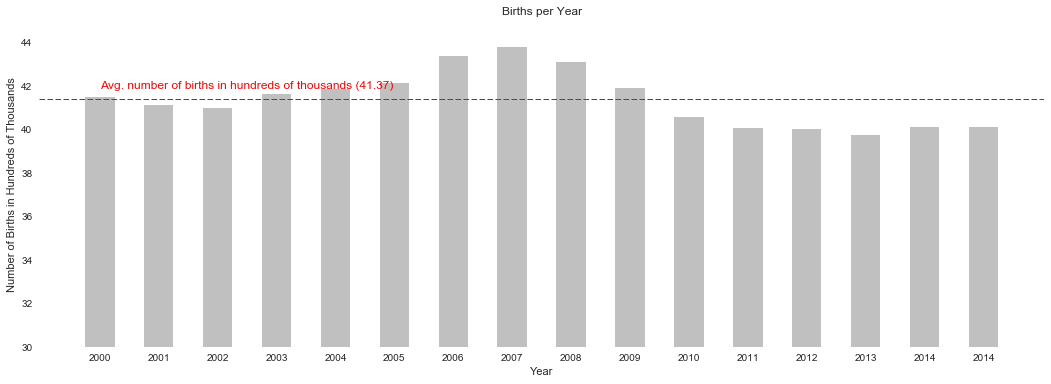

In [15]:
bar_heights = df_cdc_ssa['births_in_hundredThousand'].values
bar_positions = np.arange(len(df_cdc_ssa.index))

fig, ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(6)

ax.bar(bar_positions, bar_heights, .5, color='silver')
ax.set_title('Births per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Births in Hundreds of Thousands')

ax.set_xticks(np.arange(len(df_cdc_ssa.index)))
ax.set_xticklabels(df_cdc_ssa.index)

ax.set_ylim([30,45])
ax.axhline(bar_heights.mean(), color='r', linestyle='dashed', linewidth=1)
line_text = 'Avg. number of births in hundreds of thousands (' + str(round(bar_heights.mean(),2)) + ')'
ax.text(0, bar_heights.mean() + 0.5 , line_text, color='r')
ax.set_facecolor('white')
plt.show()